In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

## Decision Tree Example:

[0, 1, 0, 1]

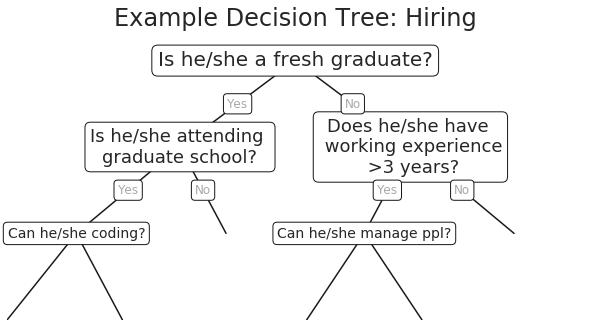

In [28]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree: Hiring', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "Is he/she a fresh graduate?", 20)
text(ax, 0.3, 0.6, "Is he/she attending \ngraduate school?", 18)
text(ax, 0.7, 0.6, "Does he/she have \n working experience\n >3 years?", 18)
text(ax, 0.12, 0.3, "Can he/she coding?", 14)
# text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
text(ax, 0.62, 0.3, "Can he/she manage ppl?", 14)
text(ax, 0.88, 0.3, "", 14)

text(ax, 0.4, 0.75, "Yes", 12, alpha=0.4)
text(ax, 0.6, 0.75, "No", 12, alpha=0.4)

text(ax, 0.21, 0.45, "Yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "No", 12, alpha=0.4)

text(ax, 0.66, 0.45, "Yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "No", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '-k')
# ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '-k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '-k')
# ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1])


1. **Information Entropy** is a common algorithm for measuring the impurity of the sample dataset

2. **Gini impurity** 
    $$G_i = 1 - \sum_{k=1}^{n}p_{i,k}^2$$
    Where $p_{i,k}$ is the ratio of class k instances among the training instances in the i-th node
    - pure: Gini=0

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [6]:
from sklearn.metrics import accuracy_score

### How to visualize a decision tree?

In [3]:
from sklearn.tree import export_graphviz

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)
export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

For the .dot file, you can convert that into PDF or PNG using dot command line tool from graphviz package. Can be found and installed here https://www.graphviz.org/

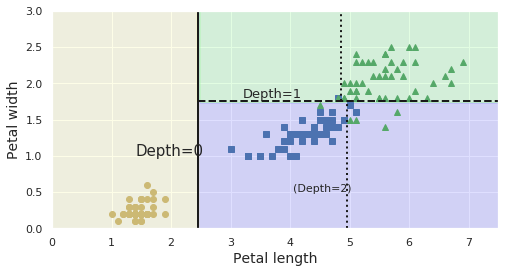

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

## CART Algorithm
**CART** Algorithm, a.k.a Classification And Regression Tree algorithm is applied by Scikit-Learn to train Decision Trees. CART starts by picking a single feature k and a corresponding threshold $t_k$, which pair $(k, t_k)$ produces the purest subsets. 

- CART produces only *binary trees*

- Cost Function
$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_right}{m}G_{right}$$
Is simply the weighted average of the subsets' Gini impurity. Once it has splitted the dataset into two, it will split the subsets based on the same loss function and logic.


- So obviously it is a recursive algorithm, what's the end point of the algo?
    1. It reaches the maximum depth, which is defined by hyper-parameter *max_depth*.
    2. It can no longer reduce the impurity if keep doing further splits.


- CART is also a greedy algorithm, for each step, it looks at the current optimal split, and consecutively combined those optimal splits together. But it never checks if that's the global optimum or not. So the CART can lead us to pretty good results, but not always the best based on the Gini measure. However it has been proved that, the problem of finding a global optimal decision tree is a NP-Complete problem, and requires $O(exp(m))$ time.

- Algorithm Complexity: for prediction, we just need to traverse through the tree, from the top to bottom. Since decision trees are roughly balanced, the depth of the tree is about $O(log(m))$, **independent of the number of features**.
 Training the algorithm needs complexity of $O(n\times mlog(m))$

### Entropy:
$$H_i = - \sum_{k=1; p_{i,k}\neq 0}^{n} p_{i,k}log(p_{i,k})$$
Where $i$ is the node of the decision tree, n is the total number of targets.
- For most cases, either Gini impurity or Information entropy will lead to similar result.
- Empirically, Gini impurity is slightly faster to compute, so it can be a good default.

- Decision Trees make few model assumption;

- Decision Trees is a nonparametric model (number of parameters is not determined prior to the training, and the model itself has lots of freedom). In contrast, a *parametric* model

- Decision Trees are not sensitive to scale.

## From Classification to Regression

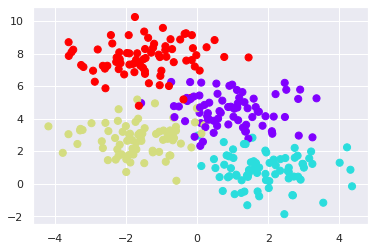

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [7]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/home/rw2694/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


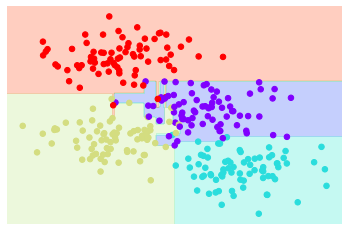

In [8]:
visualize_classifier(DecisionTreeClassifier(), X, y)